# Zomato Data Analysis Project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df= pd.read_csv('Zomato data .csv', encoding='latin1')

In [12]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# Clean and Prepare the Data 

In [14]:
# 1. Convert Ratings
df['rate'] = df['rate'].str.replace('/5', '', regex=False)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

In [16]:
df.dtypes

name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
approx_cost(for two people)      int64
listed_in(type)                 object
dtype: object

In [18]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

# Data Analysis and Visualization 

Analysis 1: Types of Restaurants 

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

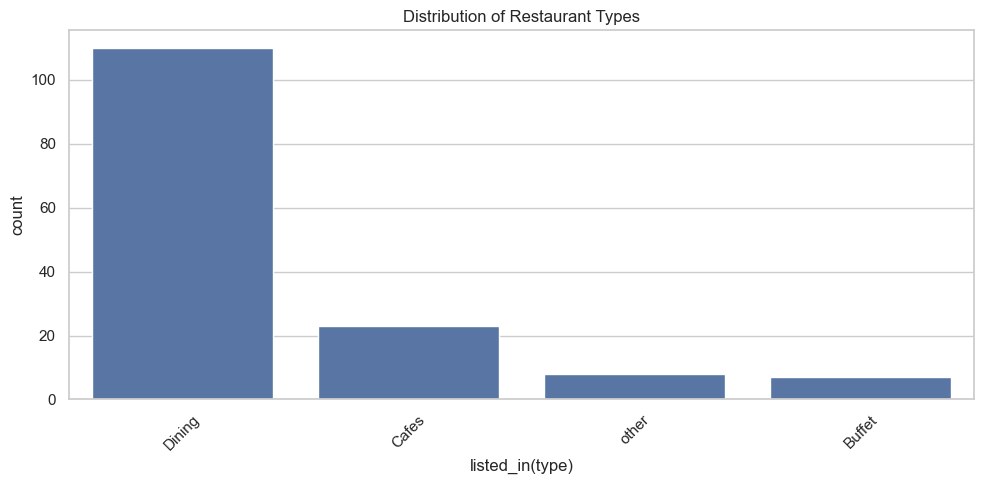

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='listed_in(type)', order=df['listed_in(type)'].value_counts().index)
plt.title('Distribution of Restaurant Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
#. Dining seems to be preferred. 

Analysis 2: Votes by Restaurant Type

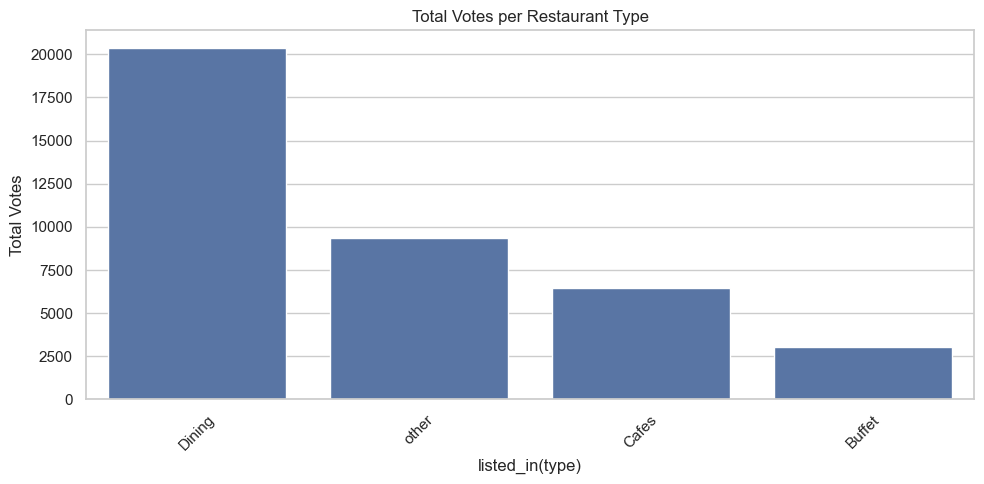

In [36]:
votes_sum = df.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=votes_sum.index, y=votes_sum.values)
plt.title('Total Votes per Restaurant Type')
plt.xticks(rotation=45)
plt.ylabel('Total Votes')
plt.tight_layout()
plt.show()

Analysis 3: Ratings Distribution

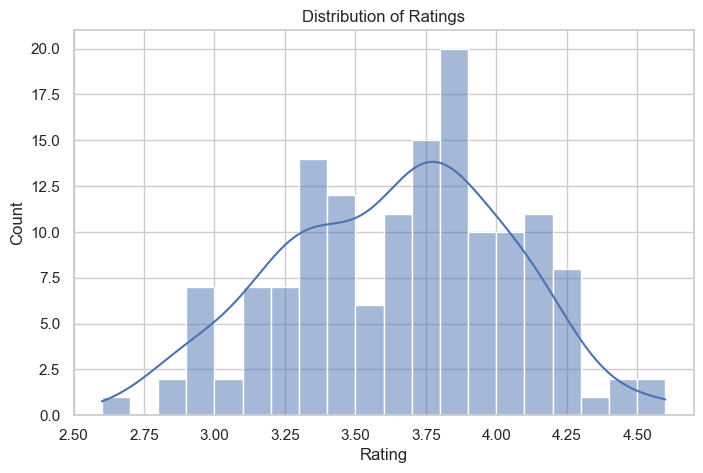

In [52]:
plt.figure(figsize=(8, 5))
sns.histplot(df['rate'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.show()

Conclusion: Identify the rating range most restaurants fall into (typically 3.5 to 4).

Analysis 4: Restaurant Cost Preference for Couples

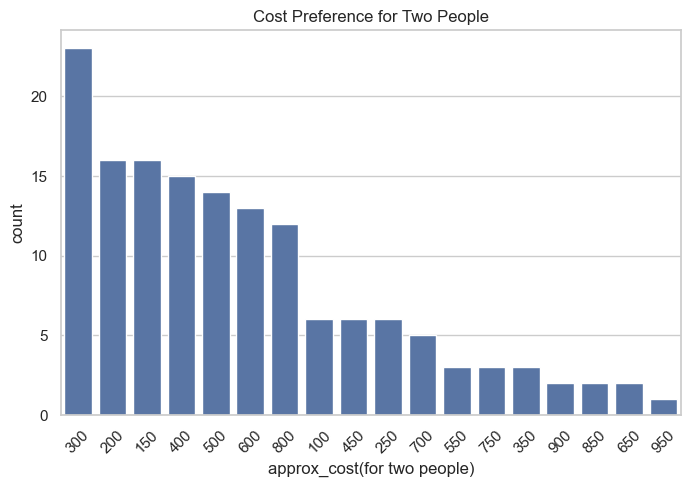

In [47]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='approx_cost(for two people)', order=df['approx_cost(for two people)'].value_counts().index)
plt.title('Cost Preference for Two People')
plt.xticks(rotation=45)
plt.show()

Analysis 5: Online vs. Offline Ratings 

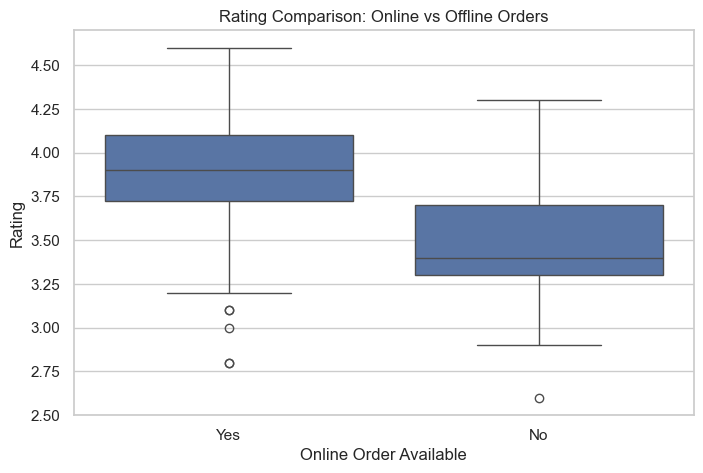

In [54]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='online_order', y='rate', data=df)
plt.title('Rating Comparison: Online vs Offline Orders')
plt.xlabel('Online Order Available')
plt.ylabel('Rating')
plt.show()

Analysis 6: Online Orders by Restaurant Type 

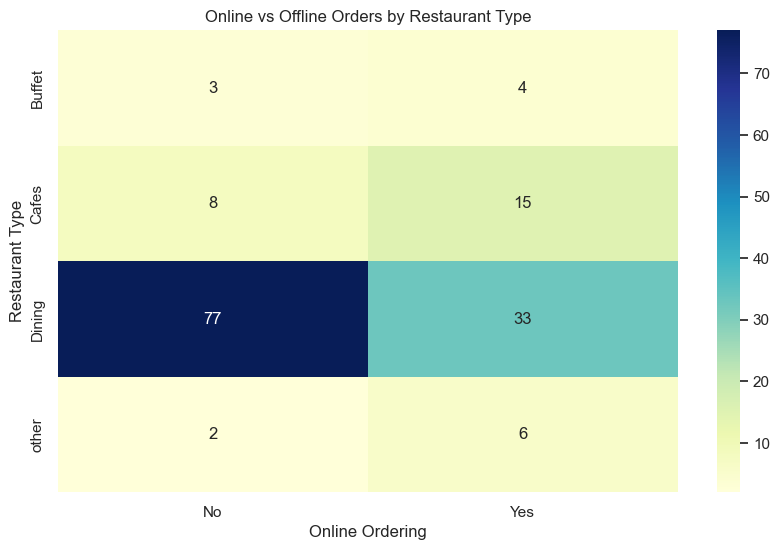

In [57]:
pivot_table = pd.pivot_table(df, index='listed_in(type)', columns='online_order', values='name', aggfunc='count', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Online vs Offline Orders by Restaurant Type')
plt.ylabel('Restaurant Type')
plt.xlabel('Online Ordering')
plt.show()

1. Most Preferred Restaurant Type for Order

In [60]:
online_pref = df[df['online_order'] == 'Yes']['listed_in(type)'].value_counts()
print("Most ordered from type:\n", online_pref.head(1))

Most ordered from type:
 listed_in(type)
Dining    33
Name: count, dtype: int64


2. Votes per Restaurant Type

In [67]:
votes_by_type = df.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False)
print("Votes by restaurant type:\n", votes_by_type)

Votes by restaurant type:
 listed_in(type)
Dining    20363
other      9367
Cafes      6434
Buffet     3028
Name: votes, dtype: int64


3. Rating Range Most Restaurants Fall Into

In [72]:
rating_counts = df['rate'].round(1).value_counts().sort_index()
most_common_rating_range = rating_counts[rating_counts == rating_counts.max()]
print("Most Common ratings\n", most_common_rating_range)

Most Common ratings
 rate
3.8    20
Name: count, dtype: int64


4. Average Spending of Couples(Online Orders)

In [77]:
couples_online_spend= df[df['online_order']=='Yes']['approx_cost(for two people)'].mean()
couples_online_spend

510.3448275862069

5. Online Vs offline - Which Has Higher Average Rating?

In [80]:
avg_ratings = df.groupby('online_order')['rate'].mean()
print(avg_ratings)

online_order
No     3.487778
Yes    3.858621
Name: rate, dtype: float64


6. Which Restaurant Type Gets MOre Offline Orders

In [89]:
offline_counts = df[df['online_order']=='No']['listed_in(type)'].value_counts()
print(offline_counts)

listed_in(type)
Dining    77
Cafes      8
Buffet     3
other      2
Name: count, dtype: int64
